In [1]:
# import libraries 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# define global figure properties 
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

# Exe 1

In [3]:
# parameters
N  = 50
h0 = -np.pi/2

In [4]:
# create the dataset
X = stats.laplace_asymmetric.rvs(2,size=N)
dataMean = np.mean(X)

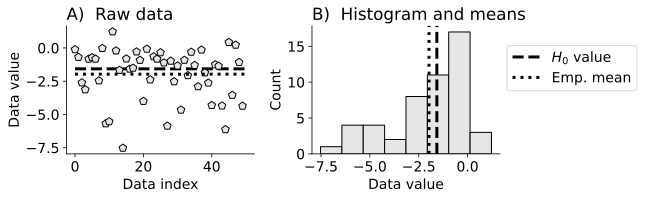

In [5]:
# plot
_,axs = plt.subplots(1,2,figsize=(9,3))

axs[0].plot(X,'kp',markersize=8,markerfacecolor=(.9,.9,.9),label='Data')
axs[0].plot([0,N],[h0,h0],'k--',zorder=-10,linewidth=3,label=r'$H_0$ value')
axs[0].plot([0,N],[dataMean,dataMean],'k:',linewidth=3,label='Emp. mean')
axs[0].set(xlabel='Data index',ylabel='Data value')
axs[0].set_title(r'A)  Raw data')

axs[1].hist(X,bins='fd',color=(.9,.9,.9),edgecolor='k')
axs[1].axvline(h0,linestyle='--',color='k',linewidth=3,label=r'$H_0$ value')
axs[1].axvline(dataMean,linestyle=':',color='k',linewidth=3,label=r'Emp. mean')
axs[1].set(xlabel='Data value',ylabel='Count')
axs[1].set_title(r'B)  Histogram and means')
axs[1].legend(bbox_to_anchor=[1,.9])

# display the figure
plt.tight_layout()
plt.show()

In [6]:
# t-tests

# manual calculation
t_num = dataMean - h0
t_den = np.std(X,ddof=1) / np.sqrt(N)

tval  = t_num / t_den
pval  = 1-stats.t.cdf( np.abs(tval) ,N-1)
pval *= 2 # double it for 2-tailed test    


In [7]:
# using scipy.stats
r  = stats.ttest_1samp(X,h0)
t  = r.statistic
df = r.df
p  = r.pvalue

In [8]:
# print both results
print(f'Manual ttest: t({N-1})={tval:.3f}, p={pval:.3f}')
print(f'Scipy  ttest: t({df})={t:.3f}, p={p:.3f}')
 

Manual ttest: t(49)=-1.446, p=0.155
Scipy  ttest: t(49)=-1.446, p=0.155


# Exe 2

In [9]:
# how often do we get subthreshold results?

nExps = 500
issig = np.zeros(nExps,dtype=bool) 
means = np.zeros(nExps)
stds  = np.zeros(nExps)

In [10]:
# run the experiment
for i in range(nExps):

  # generate data and store the mean/std
  X = stats.laplace_asymmetric.rvs(2,size=N)
  means[i] = np.mean(X)
  stds[i]  = np.std(X,ddof=1)

  # run the ttest and store if "significant"
  r = stats.ttest_1samp(X,h0)
  issig[i] = r.pvalue<.05


In [11]:
# print the results
print(f'p<.05 in {np.sum(issig)}/{nExps} times.')

p<.05 in 47/500 times.
